In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx')
data.shape

(17442, 7)

In [3]:
data.head(3)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1


In [4]:
data.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

In [5]:
data['SIZE'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [6]:
data['FUEL'].unique()

array(['gasoline', 'thinner', 'kerosene', 'lpg'], dtype=object)

In [7]:
data['DISTANCE'].unique()

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190], dtype=int64)

In [8]:
data['DESIBEL'].unique()

array([ 96, 109, 103,  95, 102,  93, 110, 111, 105, 106, 108, 107,  90,
        92,  91,  88,  85,  83,  75, 104, 112, 113,  89, 100,  87,  80,
        78,  76, 101,  86,  97,  94,  84,  82,  98,  79,  74,  99,  72],
      dtype=int64)

In [9]:
data['AIRFLOW'].unique()

array([ 0. ,  2.6,  3.2,  4.5,  7.8,  9.7, 12. , 13.3, 15.4, 15.1, 15.2,
       16. , 15.7, 15.5, 14.9, 17. , 16.6, 14.5, 13.8, 14.4, 12.3, 11.9,
       12.5, 12.9, 11.8, 11. ,  8.8,  6. ,  3.1,  0.8,  1. ,  1.1,  4. ,
        6.5,  7.5,  9. , 15. , 14.6, 16.3, 14.8, 14.1, 13.5, 12.8, 13.6,
       13.2, 11.5, 11.2, 12.2,  9.6,  5. ,  3.7,  0.4,  2.2,  7. , 16.1,
       14.2, 11.6, 10.9, 10.3, 10.7, 10. , 11.3, 10.2,  9.2,  7.4,  1.3,
       13.9, 13.1, 10.4,  2.8,  6.4, 13.4, 14.3, 10.6,  9.9, 10.5,  9.3,
        8.3,  5.8,  4.4,  9.5, 12.6, 14. ,  8.6,  3.4,  1.9,  7.2, 13. ,
        8.1,  3.8,  2. ,  8.2,  7.7,  7.9,  8.5,  2.1,  2.5,  6.1,  8.9,
        1.5,  5.4,  4.9,  5.7,  7.1,  9.1,  5.6,  4.6,  5.2,  3. ,  2.7,
        4.2,  4.8,  6.8,  6.7,  8.7,  7.3,  3.3,  3.6,  5.3,  6.3,  3.9,
        1.4,  1.6,  2.3,  1.7,  4.3,  2.9])

In [10]:
data['FREQUENCY'].unique()

array([75, 72, 70, 68, 67, 66, 65, 60, 55, 52, 51, 50, 48, 47, 46, 45, 44,
       42, 40, 38, 36, 35, 34, 33, 32, 30, 28, 27, 26, 25, 24, 23, 22, 21,
       20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,
        3,  2,  1], dtype=int64)

In [11]:
data['STATUS'].unique()

array([0, 1], dtype=int64)

In [12]:
data.head(3)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1


In [13]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data['FUEL'].values.reshape(-1,1)))
OH_cols.index = data.index


In [14]:
data = pd.concat([data, OH_cols], axis=1)
data.head(3)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,0,1,2,3
0,1,gasoline,10,96,0.0,75,0,1.0,0.0,0.0,0.0
1,1,gasoline,10,96,0.0,72,1,1.0,0.0,0.0,0.0
2,1,gasoline,10,96,2.6,70,1,1.0,0.0,0.0,0.0


In [15]:
data.drop('FUEL', axis='columns', inplace=True)

In [16]:
X = data.drop('STATUS', axis='columns')
X.head(2)

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,0,1,2,3
0,1,10,96,0.0,75,1.0,0.0,0.0,0.0
1,1,10,96,0.0,72,1.0,0.0,0.0,0.0


In [17]:
y = data['STATUS']
y.head(2)

0    0
1    1
Name: STATUS, dtype: int64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [19]:
X.head(2)

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,0,1,2,3
0,0.0,0.0,0.585366,0.0,1.000000,1.0,0.0,0.0,0.0
1,0.0,0.0,0.585366,0.0,0.959459,1.0,0.0,0.0,0.0


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13081, 9) (4361, 9) (13081,) (4361,)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
from sklearn.metrics import confusion_matrix
def make_heatmap(model, X, y, title = 'Test dataset',  figsize = (8, 5)):
    y_predicted = np.array([1 if val > 0.5 else 0 for val in model.predict(X)], dtype='int64')
    cm = confusion_matrix(y, y_predicted)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(title)
    

In [23]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
print(f'Train dataset = {LR.score(X_train, y_train)}')
print(f'Test dataset = {LR.score(X_test, y_test)}')

Train dataset = 0.8954972861402033
Test dataset = 0.904609034625086


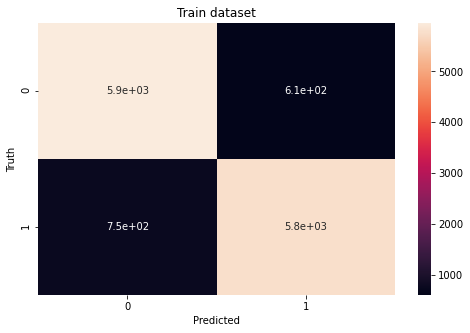

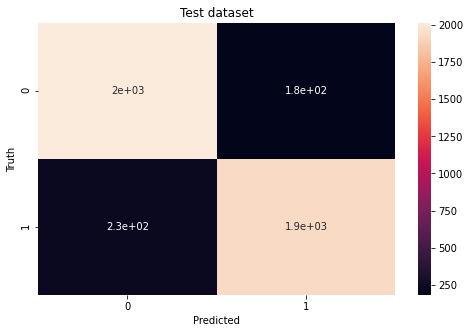

In [24]:
make_heatmap(LR, X_train, y_train, 'Train dataset')
make_heatmap(LR, X_test, y_test, 'Test dataset')

In [25]:
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
print(f'Train dataset = {SVC_model.score(X_train, y_train)}')
print(f'Test dataset = {SVC_model.score(X_test, y_test)}')

Train dataset = 0.9369314272609127
Test dataset = 0.9360238477413437


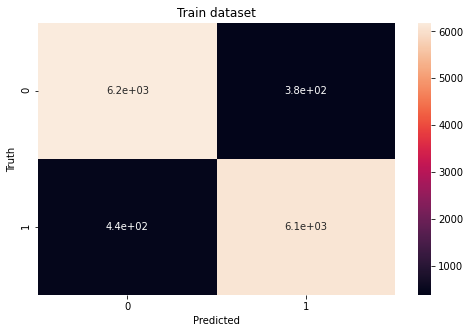

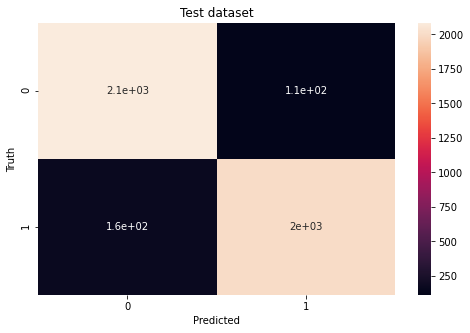

In [26]:
make_heatmap(SVC_model, X_train, y_train, 'Train dataset')
make_heatmap(SVC_model, X_test, y_test, 'Test dataset')

In [27]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
print(f'Train dataset = {DTC.score(X_train, y_train)}')
print(f'Test dataset = {DTC.score(X_test, y_test)}')

Train dataset = 1.0
Test dataset = 0.9637697775739509


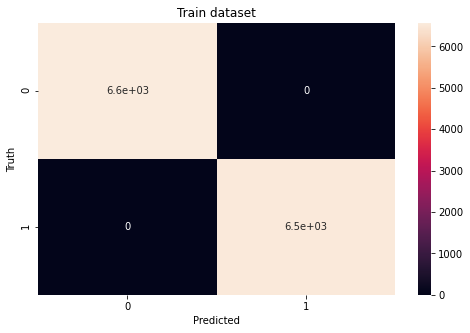

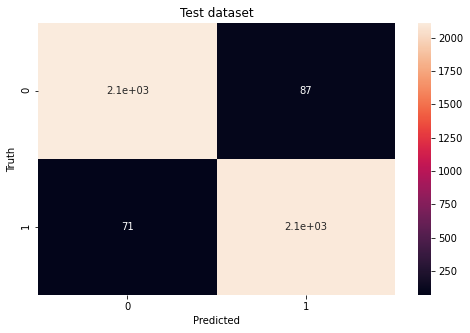

In [28]:
make_heatmap(DTC, X_train, y_train, 'Train dataset')
make_heatmap(DTC, X_test, y_test, 'Test dataset')

In [67]:
RFC = RandomForestClassifier(n_estimators=120)
RFC.fit(X_train, y_train)
print(f'Train dataset = {RFC.score(X_train, y_train)}')
print(f'Test dataset = {RFC.score(X_test, y_test)}')

Train dataset = 1.0
Test dataset = 0.97385920660399


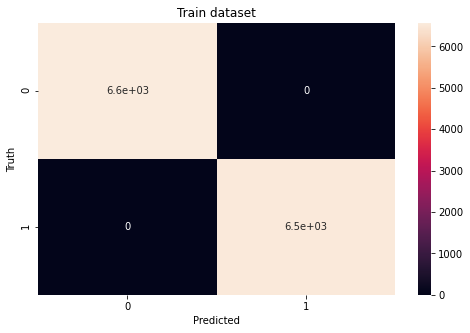

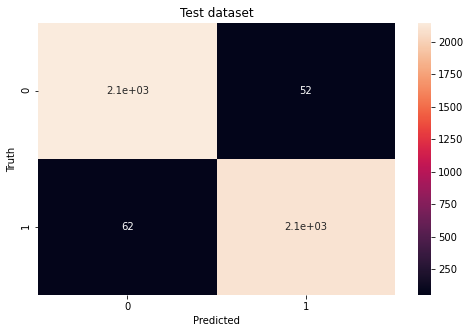

In [68]:
make_heatmap(RFC, X_train, y_train, 'Train dataset')
make_heatmap(RFC, X_test, y_test, 'Test dataset')

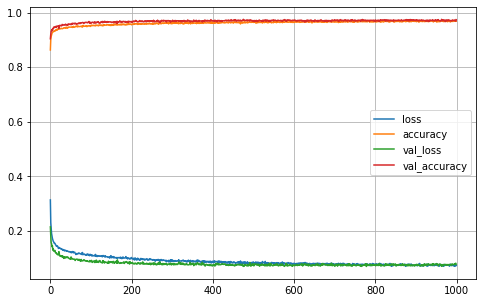

409/409 [==============================] - 1s 3ms/step - loss: 0.0463 - accuracy: 0.9817
Train dataset = [0.04626144468784332, 0.9816527962684631]
137/137 [==============================] - 1s 4ms/step - loss: 0.0789 - accuracy: 0.9739
Test dataset = [0.07888048887252808, 0.9738591909408569]


In [72]:
import keras
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

NN = keras.Sequential([
    keras.layers.Dense(200, activation='relu', input_shape=(9,)),
    keras.layers.Dropout(.6),
    keras.layers.Dense(100, activation='relu',),
    keras.layers.Dropout(.2),
    keras.layers.Dense(50, activation='relu',),
    keras.layers.Dense(1, activation='sigmoid')
])

NN.compile(
    optimizer = 'Adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

history = NN.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 1000,
    verbose = 0
)

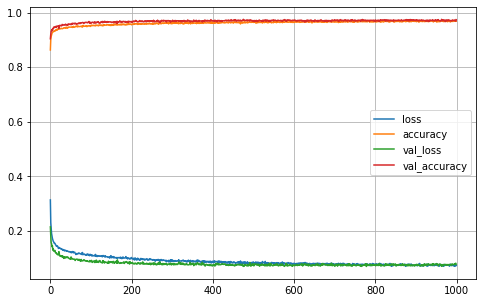

409/409 [==============================] - 1s 3ms/step - loss: 0.0463 - accuracy: 0.9817
Train dataset = [0.04626144468784332, 0.9816527962684631]
137/137 [==============================] - 1s 3ms/step - loss: 0.0789 - accuracy: 0.9739
Test dataset = [0.07888048887252808, 0.9738591909408569]


In [73]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

print(f'Train dataset = {NN.evaluate(X_train, y_train)}')
print(f'Test dataset = {NN.evaluate(X_test, y_test)}')

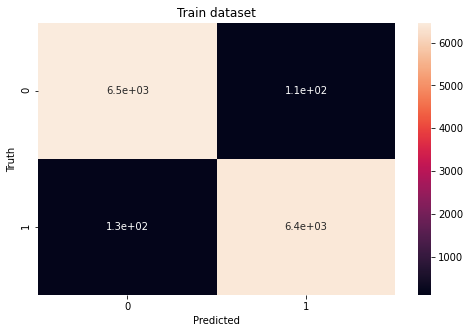

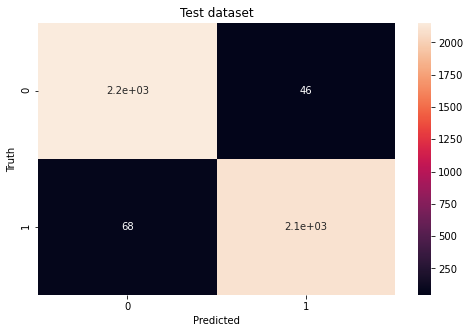

In [74]:
make_heatmap(NN, X_train, y_train, 'Train dataset')
make_heatmap(NN, X_test, y_test, 'Test dataset')

In [75]:
import joblib
joblib.dump(OH_encoder, 'Encoder/OH_encoder.joblib')
joblib.dump(scaler, 'Encoder/scaler.joblib')

['Encoder/scaler.joblib']

In [76]:
joblib.dump(LR, 'Models/LR.joblib')
joblib.dump(SVC_model, 'Models/SVC.joblib')
joblib.dump(DTC, 'Models/DTC.joblib')
joblib.dump(RFC, 'Models/RFC.joblib')
NN.save('Models/NN.h5')